In [13]:
# Mengimpor fungsi untuk mengekspor pohon keputusan sebagai file .dot yang dapat divisualisasikan menggunakan Graphviz.
from sklearn.tree import export_graphviz

# Mengimpor pustaka untuk membuat grafik dan memvisualisasikan data.
import matplotlib.pyplot as plt

# Mengimpor pustaka untuk manipulasi data dan analisis.
import pandas as pd

# Mengimpor fungsi untuk standarisasi fitur, yaitu mengubah data sehingga memiliki mean 0 dan standar deviasi 1.
from sklearn.preprocessing import StandardScaler

# Mengimpor RandomForestClassifier, model ensemble yang terdiri dari banyak pohon keputusan.
from sklearn.ensemble import RandomForestClassifier

# Mengimpor fungsi untuk membagi dataset menjadi set pelatihan dan pengujian.
from sklearn.model_selection import train_test_split

# Mengimpor Pipeline untuk menyusun alur kerja pembelajaran mesin yang terdiri dari beberapa langkah pemrosesan data dan model.
from sklearn.pipeline import Pipeline

# Mengimpor fungsi untuk menghasilkan laporan klasifikasi, termasuk metrik seperti precision, recall, dan f1-score.
from sklearn.metrics import classification_report

# Mengimpor fungsi untuk menampilkan confusion matrix dari hasil prediksi model.
from sklearn.metrics import ConfusionMatrixDisplay

# Mengimpor fungsi untuk mengonversi model scikit-learn menjadi format ONNX (Open Neural Network Exchange).
from skl2onnx import to_onnx

# Mengimpor ONNX Runtime untuk menjalankan model ONNX.
import onnxruntime as ort

# Mengimpor pustaka MLflow untuk melacak eksperimen pembelajaran mesin.
import mlflow

# Mengimpor pustaka numpy untuk komputasi numerik.
import numpy as np

# Mengaktifkan pelacakan otomatis untuk model scikit-learn dengan MLflow. 
# Ini akan secara otomatis menyimpan model, parameter, dan metrik selama pelatihan.
mlflow.set_experiment('baseline-randomforest')
mlflow.sklearn.autolog()

In [14]:
# Membaca dataset 'Iris.csv' dari folder 'data/raw' dan memuatnya ke dalam objek DataFrame `df`.
# `pd.read_csv` digunakan untuk membaca file CSV dan mengonversinya menjadi DataFrame, yang merupakan struktur data tabular di Pandas.
df = pd.read_csv('data/raw/Iris.csv')

In [15]:
# Menampilkan 5 baris pertama dari DataFrame `df`.
# `df.head()` digunakan untuk melihat sekilas data teratas dalam DataFrame, secara default menampilkan 5 baris pertama.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# Memisahkan fitur (X) dan label (y) dari DataFrame `df`.
# `X` berisi kolom-kolom yang mewakili fitur input, yaitu panjang dan lebar sepal serta panjang dan lebar petal dari bunga Iris.
X = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]

# `y` berisi kolom 'Species' yang merupakan label atau target yang ingin diprediksi, yaitu spesies bunga Iris.
y = df['Species']

In [17]:
# Membagi data menjadi set pelatihan dan set pengujian.
# `train_test_split` digunakan untuk membagi data `X` (fitur) dan `y` (label) menjadi data pelatihan dan pengujian.
# `test_size=0.2` berarti 20% dari data akan digunakan sebagai set pengujian, dan 80% sebagai set pelatihan.
# `stratify=y` memastikan bahwa proporsi kelas dalam set pelatihan dan pengujian sama dengan proporsi di seluruh dataset (stratified sampling).
# `random_state=42` memastikan bahwa pembagian data selalu sama setiap kali kode dijalankan (reproducibility).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
# Membuat pipeline untuk alur kerja pembelajaran mesin yang terdiri dari dua langkah.
# Pipeline adalah alat untuk merangkai beberapa langkah pemrosesan secara berurutan.

model = Pipeline([
    # Langkah pertama adalah `scaler`, yang melakukan standarisasi fitur menggunakan `StandardScaler`.
    # `StandardScaler()` mengubah data sehingga memiliki mean 0 dan standar deviasi 1, yang dapat meningkatkan performa model.
    ('scaler', StandardScaler()),
    
    # Langkah kedua adalah `algo`, yang merupakan algoritma pembelajaran mesin yang akan digunakan.
    # `RandomForestClassifier` adalah model ensemble yang terdiri dari banyak pohon keputusan.
    # `random_state=42` digunakan untuk memastikan hasil yang dapat direproduksi.
    ('algo', RandomForestClassifier(random_state=42))
])

In [19]:
# Melatih model dengan data pelatihan.
# `model.fit(X_train, y_train)` akan mengeksekusi semua langkah dalam pipeline terhadap data pelatihan.
# Pada langkah pertama, `X_train` akan dinormalisasi menggunakan `StandardScaler`.
# Setelah itu, model `RandomForestClassifier` akan dilatih menggunakan fitur yang telah dinormalisasi (`X_train`) dan label (`y_train`).
model.fit(X_train, y_train)

2024/08/17 18:02:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6e93ec1fd28b4d1e81b0a00c227bf1fa', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/08/17 18:02:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run rebellious-mink-564 at: https://dagshub.com/izzalDev/iris-classification.mlflow/#/experiments/1/runs/6e93ec1fd28b4d1e81b0a00c227bf1fa.
2024/08/17 18:02:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/izzalDev/iris-classification.mlflow/#/experiments/1.


Pipeline(steps=[('scaler', StandardScaler()),
                ('algo', RandomForestClassifier(random_state=42))])

In [20]:
# Membuat prediksi menggunakan model yang telah dilatih pada data pengujian.
# `model.predict(X_test)` akan menerapkan pipeline pada data `X_test`, yang mencakup langkah normalisasi (dengan `StandardScaler`)
# dan kemudian menghasilkan prediksi kelas menggunakan model `RandomForestClassifier`.
# Hasil prediksi ini disimpan dalam variabel `y_pred`.
y_pred = model.predict(X_test)

In [21]:
# Menampilkan laporan klasifikasi yang merangkum performa model pada data pengujian.
# `classification_report(y_test, y_pred)` menghasilkan metrik evaluasi seperti precision, recall, f1-score, dan support
# untuk setiap kelas dalam data. Metrik-metrik ini membantu dalam menilai seberapa baik model dalam mengklasifikasikan data.
# Laporan ini kemudian dicetak ke konsol dengan menggunakan fungsi `print`.
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



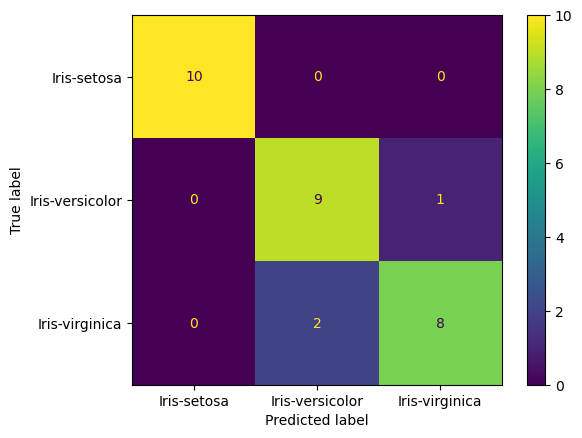

In [22]:
# Menampilkan confusion matrix berdasarkan hasil prediksi model.
# `ConfusionMatrixDisplay.from_predictions(y_test, y_pred)` membuat visualisasi dari confusion matrix yang menunjukkan
# jumlah prediksi yang benar dan salah untuk setiap kelas. Confusion matrix membantu dalam menganalisis kesalahan model,
# seperti kelas mana yang sering tertukar dengan kelas lain.
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Menampilkan plot confusion matrix yang telah dibuat.
# `plt.show()` digunakan untuk menampilkan grafik yang dibuat oleh matplotlib, dalam hal ini adalah confusion matrix.
plt.show()

In [23]:
# Mengonversi model scikit-learn ke format ONNX (Open Neural Network Exchange).
# `to_onnx` mengonversi model pipeline ke format ONNX yang dapat digunakan untuk inferensi dengan ONNX Runtime atau sistem lainnya.
# `X_test[:1].to_numpy()` memberikan satu contoh data dari `X_test` untuk menentukan bentuk input yang diharapkan oleh model dalam format ONNX.
# `options={'zipmap':False}` mengatur opsi konversi untuk ONNX, di mana 'zipmap':False berarti label target tidak akan dikonversi menggunakan zipmap (pemetaan label).
onnx_model = to_onnx(model, X_test[:1].to_numpy(), options={'zipmap':False})

# Menyimpan model ONNX yang telah dikonversi ke file dengan nama 'model.onnx'.
# `onnx_model.SerializeToString()` mengubah model ONNX menjadi string biner yang kemudian disimpan ke file.
with open('models/model.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())

In [24]:
# SANITY CHECK

# Membuat sesi inferensi ONNX menggunakan model yang telah dikonversi.
# `ort.InferenceSession` menginisialisasi sesi inferensi dengan model ONNX, memungkinkan eksekusi prediksi menggunakan ONNX Runtime.
sess = ort.InferenceSession(onnx_model.SerializeToString())

# Mengambil nama input dari model ONNX. `sess.get_inputs()` memberikan informasi tentang tensor input yang diharapkan oleh model.
# `name` adalah nama dari tensor input pertama dalam model.
input_name = sess.get_inputs()[0].name

# Mengambil nama output dari model ONNX. `sess.get_outputs()` memberikan informasi tentang tensor output dari model.
# `name` adalah nama dari tensor output pertama dalam model.
labe_name = sess.get_outputs()[0].name

# Menjalankan inferensi pada data `X_test` menggunakan sesi inferensi ONNX dan menyimpan hasilnya dalam `pred_onnx`.
# `sess.run([labe_name], {input_name: X_test.to_numpy()})` menjalankan model ONNX dan memberikan hasil prediksi untuk data input.
pred_onnx = sess.run([labe_name], {input_name: X_test.to_numpy()})

# Membandingkan hasil prediksi dari model ONNX (`pred_onnx`) dengan hasil prediksi dari model scikit-learn (`y_pred`).
# Jika semua hasil prediksi sama, cetak 'SUCCESS', jika tidak, cetak 'FAILURE'.
if (pred_onnx == y_pred).all():
    print('SUCCESS')
else:
    print('FAILURE')

SUCCESS
